In [1]:
%matplotlib inline

from fbprophet import Prophet

import pandas as pd

import datetime

df = pd.read_csv('./lookup.csv')
df = df.iloc[8:,:-1]
df = df[::-1]
df = df.rename(columns={'Canadian Interest Rates': 'ds', 'Unnamed: 1': 'y'}).reset_index().drop(['index'], axis=1)

In [43]:
# df['ds'] = df.ds.apply(lambda x:datetime.datetime.strptime(x, "%Y-%m-%d"))

In [2]:
df['y'] = df.y.apply(lambda x:float(x))

In [20]:
df

,ds,y
0,2008-06-18,4.75
1,2008-06-25,4.75
2,2008-07-02,4.75
3,2008-07-09,4.75
4,2008-07-16,4.75
5,2008-07-23,4.75
6,2008-07-30,4.75
7,2008-08-06,4.75
8,2008-08-13,4.75
9,2008-08-20,4.75


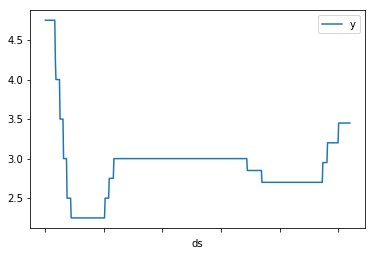

In [3]:
df.plot(x='ds', y='y')

In [4]:
m = Prophet()

In [5]:
m.fit(df)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/NoSlack/anaconda/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [15]:
future = m.make_future_dataframe(periods=365*3+90)
future.tail()

,ds
1701,2021-08-30
1702,2021-08-31
1703,2021-09-01
1704,2021-09-02
1705,2021-09-03


In [16]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1701,2021-08-30,4.692553,2.670204,6.652328
1702,2021-08-31,4.695220,2.679522,6.725794
1703,2021-09-01,4.698104,2.706201,6.698754
1704,2021-09-02,4.701219,2.663529,6.726498
1705,2021-09-03,4.704572,2.681563,6.719958


In [19]:
forecast[::90]

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2008-06-18,5.152793,5.152793,5.152793,4.970191,5.245338,-0.047960,-0.047960,-0.047960,0.0,0.0,0.0,-0.047960,-0.047960,-0.047960,5.104833
90,2010-03-10,2.375079,2.375079,2.375079,2.185094,2.458756,-0.047344,-0.047344,-0.047344,0.0,0.0,0.0,-0.047344,-0.047344,-0.047344,2.327735
180,2011-11-30,3.008979,3.008979,3.008979,2.911952,3.193037,0.041487,0.041487,0.041487,0.0,0.0,0.0,0.041487,0.041487,0.041487,3.050466
270,2013-08-21,3.004698,3.004698,3.004698,2.883062,3.154765,0.015329,0.015329,0.015329,0.0,0.0,0.0,0.015329,0.015329,0.015329,3.020027
360,2015-05-13,2.826776,2.826776,2.826776,2.641596,2.906892,-0.050304,-0.050304,-0.050304,0.0,0.0,0.0,-0.050304,-0.050304,-0.050304,2.776472
450,2017-02-01,2.837325,2.837325,2.837325,2.694461,2.960538,-0.015240,-0.015240,-0.015240,0.0,0.0,0.0,-0.015240,-0.015240,-0.015240,2.822085
540,2018-06-26,3.396659,3.396659,3.396659,3.204895,3.464283,-0.063726,-0.063726,-0.063726,0.0,0.0,0.0,-0.063726,-0.063726,-0.063726,3.332933
630,2018-09-24,3.495365,3.466363,3.536315,3.446542,3.745939,0.099667,0.099667,0.099667,0.0,0.0,0.0,0.099667,0.099667,0.099667,3.595032
720,2018-12-23,3.594070,3.499082,3.705999,3.422154,3.784924,0.001549,0.001549,0.001549,0.0,0.0,0.0,0.001549,0.001549,0.001549,3.595619
810,2019-03-23,3.692776,3.479721,3.905026,3.406645,3.901389,-0.041733,-0.041733,-0.041733,0.0,0.0,0.0,-0.041733,-0.041733,-0.041733,3.651043


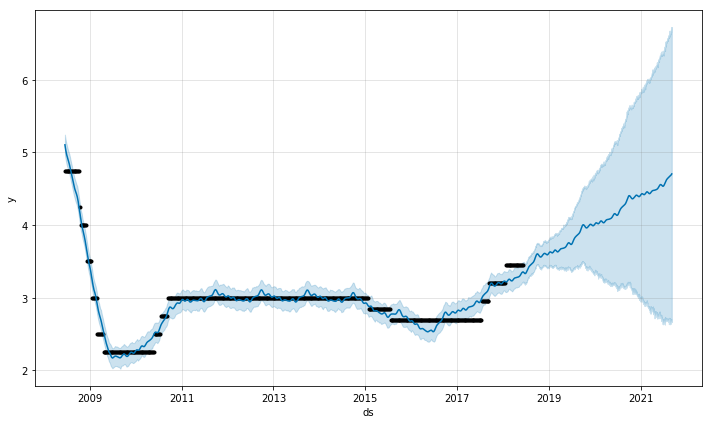

In [17]:
# Python
fig1 = m.plot(forecast)